<a href="https://colab.research.google.com/github/zakariyyabrewster/pytorch-unet/blob/main/unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/zakariyyabrewster/pytorch-unet

Cloning into 'pytorch-unet'...
remote: Enumerating objects: 970, done.
remote: Counting objects: 100% (970/970), done.
remote: Compressing objects: 100% (556/556), done.
remote: Total 970 (delta 433), reused 901 (delta 402), pack-reused 0 (from 0)
Receiving objects: 100% (970/970), 20.89 MiB | 23.61 MiB/s, done.
Resolving deltas: 100% (433/433), done.


In [1]:
%cd pytorch-unet

/content/pytorch-unet


In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.67.1
    Uninstalling tqdm-4.67.1:
      Successfully uninstalled tqdm-4.67.1
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.2.1
    Uninstalling pillow-11.2.1:
      Successfully uninstalled pillow-11.2.1
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matp

In [2]:
!python train.py --epochs 20 -l 5e-5 --amp

INFO: Using device cuda
INFO: Network:
	1 input channels
	1 output channels (classes)
	Transposed conv upscaling
INFO: Creating dataset with 412 examples
INFO: Scanning mask files to determine unique values
100% 412/412 [00:02<00:00, 165.67it/s]
INFO: Unique mask values: [0, 255]
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: anony-mouse-547383114656570578 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.19.11
wandb: Run data is saved locally in /content/pytorch-unet/wandb/run-20250530_182330-csk7akgx
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run cerulean-eon-1
wandb: ⭐️ View project at https://wandb.ai/anony-mouse-547383114656570578/U-Net?apiKey=6304be6f7cf12c7ff1cba56df9fad13ef9663024
wandb: 🚀 View run at https://wandb.ai/anony-mouse-547383114656570578/U-Net/runs/csk7akgx?apiKey=6304be6f7cf12c7ff1cba56df9fa

In [14]:
!python predict.py --model checkpoints/checkpoint_final.pth -i data/imgs/Misc_157.png data/imgs/Misc_160.png -n -v

INFO: Loading model checkpoints/checkpoint_final.pth
INFO: Using device cuda
INFO: Model loaded!
INFO: Predicting image data/imgs/Misc_157.png ...
INFO: Visualizing results for image data/imgs/Misc_157.png, close to continue...
INFO: Predicting image data/imgs/Misc_160.png ...
INFO: Visualizing results for image data/imgs/Misc_160.png, close to continue...


In [24]:
import glob
input_files = glob.glob('data/imgs/*.png')

for file in input_files:
    !python predict.py --model checkpoints/checkpoint_final.pth -i "{file}"

INFO: Loading model checkpoints/checkpoint_final.pth
INFO: Using device cuda
INFO: Model loaded!
INFO: Predicting image data/imgs/Misc_152.png ...
INFO: Mask saved to data/outputs/Misc_152_pixels0_OUT.png
INFO: Loading model checkpoints/checkpoint_final.pth
INFO: Using device cuda
INFO: Model loaded!
INFO: Predicting image data/imgs/Misc_367.png ...
INFO: Mask saved to data/outputs/Misc_367_pixels0_OUT.png
INFO: Loading model checkpoints/checkpoint_final.pth
INFO: Using device cuda
INFO: Model loaded!
INFO: Predicting image data/imgs/Misc_384.png ...
INFO: Mask saved to data/outputs/Misc_384_pixels0_OUT.png
INFO: Loading model checkpoints/checkpoint_final.pth
INFO: Using device cuda
INFO: Model loaded!
INFO: Predicting image data/imgs/Misc_110.png ...
INFO: Mask saved to data/outputs/Misc_110_pixels0_OUT.png
INFO: Loading model checkpoints/checkpoint_final.pth
INFO: Using device cuda
INFO: Model loaded!
INFO: Predicting image data/imgs/Misc_369.png ...
INFO: Mask saved to data/outputs/

In [33]:
!python eval_metrics.py

Mean IoU: 0.0138
Mean F-measure: 0.0166
(412,)
(412,)
[411 262 265 266  74  70 268 272 273  64 242  63 276  60 282  56  55  53
  52 287 292 275 293  87 220 131 143 127 144 147 149 121 160 113 222 182
 184 187 189 191 193  99 194 195 196 107 295  67  46 335 336 337 342 347
 353 363 373  14  13 382 389 390 392 395 396 397 409   2 332 318 134 299
  36 307 317 306 300 310 308 315  43 297 296 298 364  96  98 309 102 138
 391 267 246 155 201 202 348 263   1 111 133 203  33 145 264  22 170  59
 150  71 154 140 105 128 172  42 404 118 109 177  54  75 254  47  73 259
  97 351 112 243 346  57 247 169 269   0  76 208 207 217 106  80 206  32
 251  24  10 400 120 132 152 256  84  83 114 174 215 260 204  81 117 368
 248 253 352 205 104 333 192  68  89 312 284 289 141 290 403 227 116 198
 190  78 115  72 230  86 212 110 344 233 372 249 124 274 213 100  38  66
 216 291 122 103  85 238 185 301 157 252 277  28 294  62 302 101 270 349
  45 255 245 338 258  51 161 137   9  91  35 119 330 186 408 148 239 3

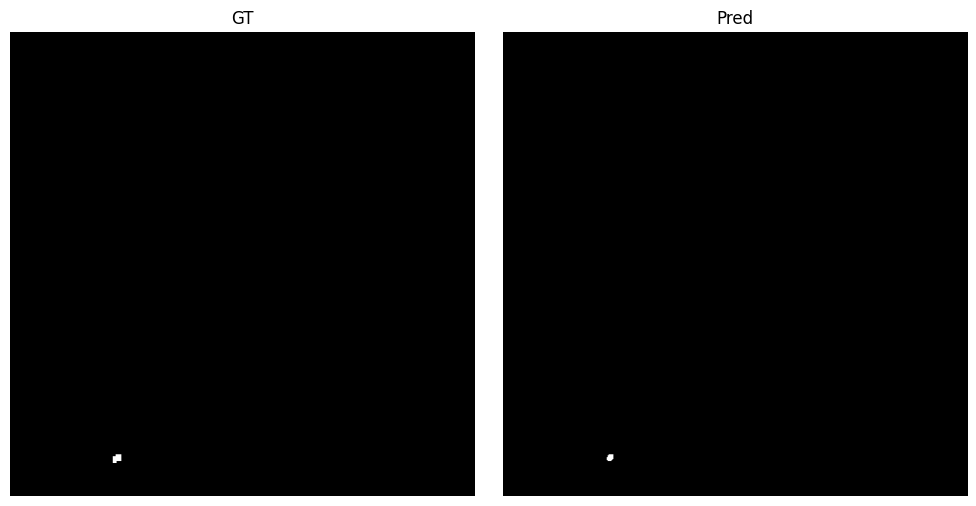

In [159]:
import os
import numpy as np
from PIL import Image
from glob import glob
from pathlib import Path
import matplotlib.pyplot as plt

def load_mask(path):
    return np.array(Image.open(path)) // 255

class InstanceMetrics:
    def __init__(self, gt, pred):
        self.gt = gt.astype(bool)
        self.pred = pred.astype(bool)
        self.tp = np.sum(self.gt & self.pred)
        self.tn = np.sum(~self.gt & ~self.pred)
        self.fp = np.sum(~self.gt & self.pred)
        self.fn = np.sum(self.gt & ~self.pred)
        self.union = np.sum(self.gt) + np.sum(self.pred) - self.tp
        self.beta = 0.3
        self.precision = self.tp / (self.tp + self.fp + 1e-8)
        self.recall = self.tp / (self.tp + self.fn + 1e-8)
        self.f_measure = ((1 + self.beta ** 2) * self.precision * self.recall) / (self.beta ** 2 * self.precision + self.recall + 1e-8)
        self.tpr = self.recall
        self.fpr = self.fp / (self.fp + self.tn + 1e-8)
        self.iou = self.tp / (self.union + 1e-8)

    def __str__(self):
        return f"Precision: {self.precision:.4f}, Recall: {self.recall:.4f}, F-measure: {self.f_measure:.4f} \nTrue Positive Rate (TPR): {self.tpr:.4f}, False Positive Rate (FPR): {self.fpr:.4f}, IoU: {self.iou:.4f}"

class EvalMetrics:
    def __init__(self, metrics_list):
        self.metrics_list = metrics_list
        self.mIoU = np.mean([metric.iou for metric in metrics_list])
        self.mFmeasure = np.mean([metric.f_measure for metric in metrics_list])

    def PrecisionRecall(self):
        precision_list = []
        recall_list = []
        for metric in self.metrics_list:
            precision_list.append(metric.precision)
            recall_list.append(metric.recall)

        recall_array = np.array(recall_list)
        precision_array = np.array(precision_list)
        sort_idx = np.argsort(recall_array)
        recall_array = recall_array[sort_idx]
        precision_array = precision_array[sort_idx]

        # Compute area under the curve using trapezoidal integration
        AP = np.trapz(precision_array, recall_array)

        mean_precision = np.mean(precision_list)
        mean_recall = np.mean(recall_list)
        print(f"Mean Precision: {mean_precision:.4f}, Mean Recall: {mean_recall:.4f}, AP: {AP:.4f}")
        plt.figure()
        plt.scatter(recall_list, precision_list, marker='.', label='Precision-Recall curve')
        plt.scatter(mean_recall, mean_precision, marker='o', color='red', s=100, label=f'Mean Precision-Recall: P={mean_precision:.4f}, R={mean_recall:.4f}')
        plt.axhline(y=AP, color='blue', linestyle='--', label=f'AP = {AP:.4f}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend()
        plt.savefig('metrics/PR_curve.png')

    def ROC(self):
        fpr_list = []
        tpr_list = []
        for metric in self.metrics_list:
            fpr_list.append(metric.fpr)
            tpr_list.append(metric.tpr)

        fpr_array = np.array(fpr_list)
        tpr_array = np.array(tpr_list)
        sort_idx = np.argsort(fpr_array)
        fpr_array = fpr_array[sort_idx]
        tpr_array = tpr_array[sort_idx]

        # Compute area under the curve using trapezoidal integration
        AUC = np.trapz(tpr_array, fpr_array)

        mean_fpr = np.mean(fpr_list)
        mean_tpr = np.mean(tpr_list)
        print(f"Mean FPR: {mean_fpr:.4f}, Mean TPR: {mean_tpr:.4f}, AUC: {AUC:.4f}")
        plt.figure()
        plt.scatter(fpr_list, tpr_list, marker='.', label='ROC curve')
        plt.scatter(mean_fpr, mean_tpr, marker='o', color='red', s=100, label=f'Mean ROC: TPR={mean_tpr:.4f}, FPR={mean_fpr:.4f}')
        plt.axhline(y=AUC, color='blue', linestyle='--', label=f'AUC = {AUC:.4f}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.savefig('metrics/ROC_curve.png')

    def display_metrics(self):
        print(f"Mean IoU: {self.mIoU:.4f}")
        print(f"Mean F-measure: {self.mFmeasure:.4f}")
        self.PrecisionRecall()
        self.ROC()

gt = load_mask('data/masks/Misc_171_pixels0.png')
pred = load_mask('data/outputs/Misc_171_pixels0_OUT.png')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(gt, cmap='gray')
axes[0].set_title('GT')
axes[0].axis('off')

axes[1].imshow(pred, cmap='gray')
axes[1].set_title('Pred')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [124]:
metrics_i = InstanceMetrics(gt, pred)
print(np.sum(metrics_i.gt))
print(np.sum(metrics_i.pred))
print(metrics_i.tp)
print(metrics_i.tn)
print(metrics_i.fp)
print(metrics_i.fn)
print(metrics_i.union)
print(metrics_i.precision)
print(metrics_i.recall)
print(metrics_i.f_measure)
print(metrics_i.tpr)
print(metrics_i.fpr)
print(metrics_i.iou)

65
41
40
230334
1
25
66
0.9756097558596074
0.6153846152899409
0.9306296557059578
0.6153846152899409
4.3415025940476115e-06
0.6060606059687788


Mean IoU: 0.4837
Mean F-measure: 0.6311
Mean Precision: 0.6543, Mean Recall: 0.5852, AP: 0.8507
Mean FPR: 0.0006, Mean TPR: 0.5852, AUC: 0.0766


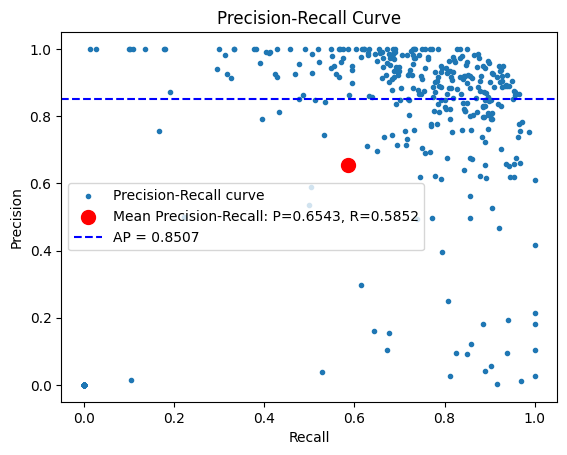

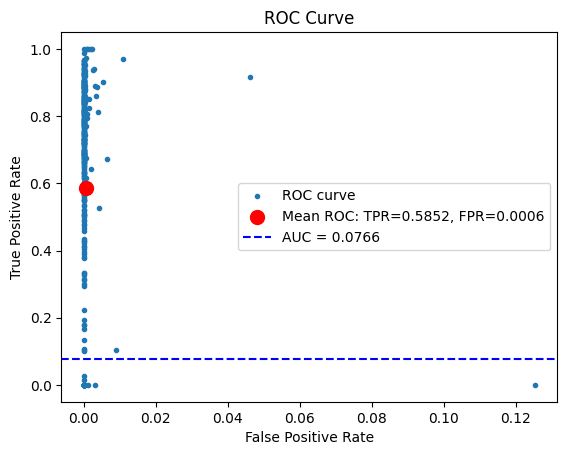

In [160]:
model_metrics = []
os.makedirs('metrics', exist_ok=True)
gt_dir = 'data/masks'
pred_dir = 'data/outputs'
gt_files = sorted(glob(os.path.join(gt_dir, '*.png')))
for gt_path in gt_files:
    base_name = os.path.splitext(os.path.basename(gt_path))[0]
    pred_name = base_name + '_OUT.png'
    pred_path = os.path.join(pred_dir, pred_name)
    if not os.path.exists(pred_path):
        print(f"Prediction file {pred_path} does not exist.")
        continue

    gt = load_mask(gt_path)
    pred = load_mask(pred_path)
    assert gt.shape == pred.shape, f"Shape mismatch: {gt.shape} vs {pred.shape}"
    metrics_i = InstanceMetrics(gt, pred)
    model_metrics.append(metrics_i)

eval_metrics = EvalMetrics(model_metrics)
eval_metrics.display_metrics()